### k-means Clustering
k-means clustering is one of the simplest algorithms which uses unsupervised learning method to solve known clustering issues.
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
k-means clustering require following two inputs.
k = number of clusters
Training set(m) = {x1, x2, x3,……….., xm}

**choosing the number of clusters**
We can draw a curve between WSS (within sum of squares) and the number of clusters. It is called elbow method because the curve looks like a human arm and the elbow point gives us the optimum number of clusters.<br>
OR <br>
Purpose Based: You can run k-means clustering algorithm to get different clusters based on a variety of purposes. You can partition the data on different metrics and see how well it performs for that particular case

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [165]:
df=df[["LoanAmount","ApplicantIncome"]]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 613
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LoanAmount       593 non-null    float64
 1   ApplicantIncome  593 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.9 KB


       LoanAmount  ApplicantIncome
count  593.000000       593.000000
mean   146.367622      5405.053963
std     85.521886      6158.891733
min      9.000000       150.000000
25%    100.000000      2889.000000
50%    128.000000      3812.000000
75%    168.000000      5780.000000
max    700.000000     81000.000000
{1: [245, 78236], 2: [63, 23864], 3: [492, 1608]}


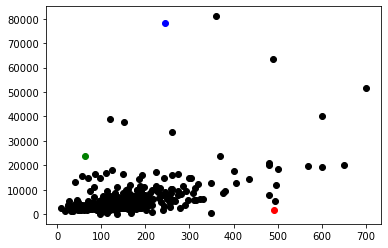

In [166]:
#number of clusters
k=3
print(df.describe())
#centroids[i]=[x,y]
centroids = {
    i+1:[np.random.randint(df["LoanAmount"].min(),df["LoanAmount"].max()),np.random.randint(df["ApplicantIncome"].min(),df["ApplicantIncome"].max())]
    for i in range(k)
}
print(centroids)
plt.scatter(df["LoanAmount"],df["ApplicantIncome"],color='k') 
colmap={1:'b', 2:'g',3:'r'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.show()

In [168]:
def cluster(df, centroids):
    for i in centroids.keys():
        df["dist_{}".format(i)] = (np.sqrt((df["LoanAmount"]-centroids[i][0])**2 +(df["ApplicantIncome"]-centroids[i][1])**2)) 
    dist_cols = ['dist_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,dist_cols].idxmin(axis=1)
    print(df['closest'].dtype)
    df['closest'] = df['closest'].map(lambda x : int(x.lstrip('dist_')))
    df['color'] =  df['closest'].map(lambda x : colmap[x])
    print(df)
    return df
df =cluster(df, centroids)

object
     LoanAmount  ApplicantIncome        dist_1        dist_2       dist_3  \
0         120.0             5849  72387.107927  18015.090175  4257.283758   
1         128.0             4583  73653.092929  19281.109564  2997.185513   
2          66.0             3000  75236.212936  20864.000216  1455.726623   
3         120.0             2583  75653.103267  21281.076336  1043.555940   
4         141.0             6000  72236.074866  17864.170286  4406.003291   
..          ...              ...           ...           ...          ...   
609        71.0             2900  75336.200940  20964.001526  1358.861656   
610        40.0             4106  74130.283454  19758.013387  2538.564161   
611       253.0             8072  70164.000456  15793.142942  6468.416885   
612       187.0             7583  70653.023806  16281.472200  5982.779454   
613       133.0             4583  73653.085156  19281.127068  2996.582387   

     closest color  
0          3     r  
1          3     r  
2    

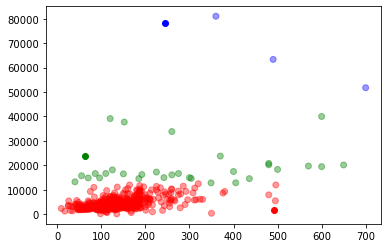

In [169]:
plt.scatter(df["LoanAmount"],df["ApplicantIncome"], color=df['color'], alpha=0.4)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])

{1: [516.6666666666666, 65366.666666666664], 2: [293.1290322580645, 19466.870967741936], 3: [136.24150268336314, 4303.441860465116]}


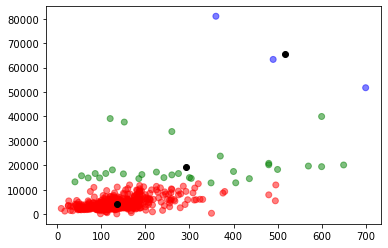

In [170]:
# Updating stage
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]["LoanAmount"])
        centroids[i][1] = np.mean(df[df['closest']==i]["ApplicantIncome"])
    return k
centroids = update(centroids)
print(centroids)

plt.scatter(df["LoanAmount"],df["ApplicantIncome"],color=df['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')

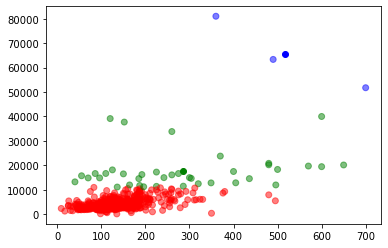

In [171]:
import copy
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break


plt.scatter(df["LoanAmount"],df["ApplicantIncome"], color=df['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])
plt.show()